# Tensorflow (CNN) binary classification model

#### Libs importing

In [13]:
# Importing basic libs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
import pathlib
import random

In [14]:
# Importing TensorFlow
import tensorflow as tf

In [15]:
# Importing ImageDataGenerator module
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# Need this lib and the parameter set to True for correct loading of truncated image files
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#### Preparing data from images

In [16]:
# Set main root path for images
root_path = "/work/Personal_CG_Learning/REBELWAY/Intro_to_Machine_Learning/Source/Datasets/Interior_Exterior_Scene_Classification"

In [17]:
os.listdir(root_path)

['val', 'train', 'Original', 'test']

In [21]:
# Get the numbers of interior and exterior images in Train set
num_interior_images = len(os.listdir(root_path + "/train/interior"))
num_exterior_images = len(os.listdir(root_path + "/train/exterior"))

num_interior_images, num_exterior_images

(800, 800)

In [23]:
# Get types names
data_dir = pathlib.Path(root_path + "/train")
types_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(types_names)

['exterior' 'interior']


In [34]:
# Function for showing randomly selected image from the dataset
def random_img(dirpath, target_class):
    directory = dirpath + "/" + target_class
    random_img = random.sample(os.listdir(directory), 1)

    img = mpimg.imread(directory + "/" + random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (478, 854, 3)


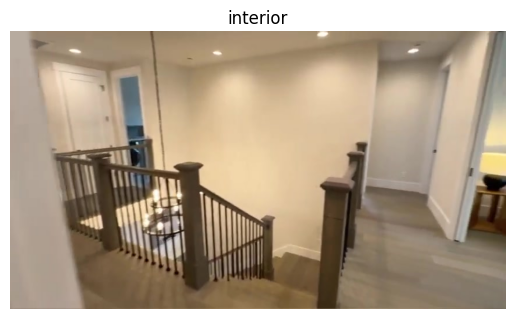

In [35]:
img = random_img(root_path + "/train", types_names[1])

#### Image convertion to dataset

In [38]:
# Normalization of Train, Test, Validation images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
# Paths for data
train_dir = root_path + "/" + "train"
test_dir = root_path + "/" + "test"
val_dir = root_path + "/" + "val"

In [41]:
# Actual data creation for Train data
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary")
# Test data and...
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary")
# Validation data
val_data = val_datagen.flow_from_directory(val_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary")

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


#### Baseline CNN model creation

In [45]:
# Baseline model creation
baseline_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(loss='binary_crossentropy',
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

baseline_model_loss = baseline_model.fit(train_data,
                                         epochs=5,
                                         steps_per_epoch=len(train_data),
                                         validation_data=val_data,
                                         validation_steps=len(val_data))

/home/dmitriy/Soft/miniconda3/envs/ML_Course/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1737057368.611377   60931 service.cc:148] XLA service 0x740244004580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737057368.611419   60931 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-01-16 21:56:08.667203: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737057368.847099   60931 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-16 21:56:10.614522: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


 3/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.4167 - loss: 0.9132

I0000 00:00:1737057371.155681   60931 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.4848 - loss: 0.7727 - val_accuracy: 0.5000 - val_loss: 0.6546
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.5508 - loss: 0.6573 - val_accuracy: 0.7150 - val_loss: 0.6491
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.7258 - loss: 0.5857 - val_accuracy: 0.7100 - val_loss: 0.5398
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.7961 - loss: 0.4611 - val_accuracy: 0.8200 - val_loss: 0.4380
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.8758 - loss: 0.3296 - val_accuracy: 0.8250 - val_loss: 0.4312


In [46]:
# Summary of the NN model
baseline_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

#### Plotting the history

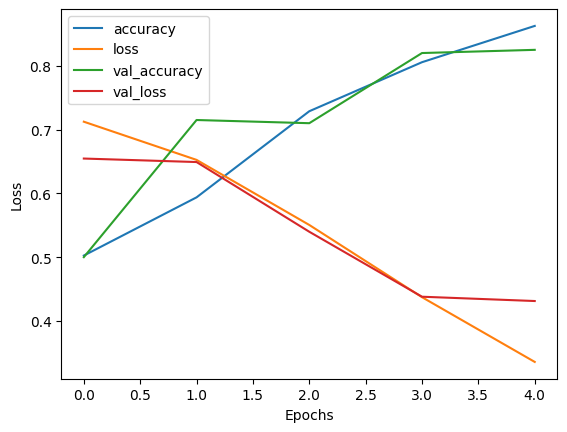

In [47]:
pd.DataFrame(baseline_model_loss.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#### Data Augmentation (Regularization)

In [49]:
# Normalization of images and changing Train data (rotate 20, shear 0.2, zoom 0.2 and flip horizontaly)
train_datagen_ag = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)                                   
val_datagen = ImageDataGenerator(rescale=1./255)   

In [50]:
# New data creation for the new model
train_data_ag = train_datagen_ag.flow_from_directory(train_dir,
                                                     batch_size=32,
                                                     target_size=(224,224),
                                                     class_mode="binary",
                                                     shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")                                                     
val_data = test_datagen.flow_from_directory(val_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")                                                     

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


#### Model v1 creation

In [51]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1_loss = model_1.fit(train_data_ag,
                           epochs=5,
                           steps_per_epoch=len(train_data_ag),
                           validation_data=val_data,
                           validation_steps=len(val_data))

/home/dmitriy/Soft/miniconda3/envs/ML_Course/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/dmitriy/Soft/miniconda3/envs/ML_Course/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 336ms/step - accuracy: 0.5466 - loss: 0.6882 - val_accuracy: 0.7750 - val_loss: 0.4890
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 335ms/step - accuracy: 0.7301 - loss: 0.5270 - val_accuracy: 0.7700 - val_loss: 0.4555
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - accuracy: 0.7547 - loss: 0.4889 - val_accuracy: 0.7850 - val_loss: 0.4417
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 335ms/step - accuracy: 0.7610 - loss: 0.4740 - val_accuracy: 0.8200 - val_loss: 0.4609
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 334ms/step - accuracy: 0.7752 - loss: 0.4619 - val_accuracy: 0.8000 - val_loss: 0.4426


#### Plotting history...

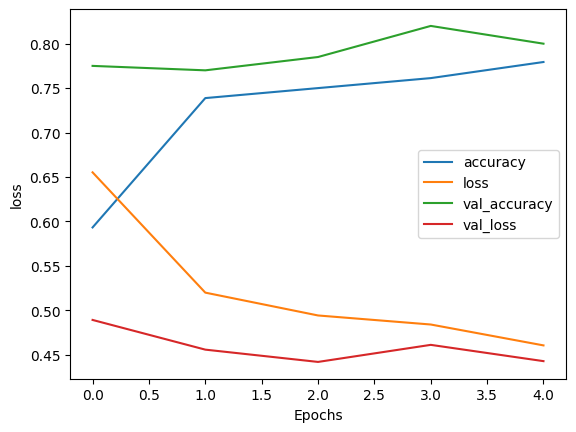

In [52]:
pd.DataFrame(model_1_loss.history).plot()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

#### Model v2

In [53]:
train_datagen_ag2 = ImageDataGenerator(rescale=1./255,
                                      rotation_range=10,
                                      shear_range=0.1,
                                      zoom_range=0.1,
                                      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [57]:
train_data_ag2 = train_datagen_ag.flow_from_directory(train_dir,
                                                     batch_size=32,
                                                     target_size=(224,224),
                                                     class_mode="binary",
                                                     shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")                                                     
val_data = test_datagen.flow_from_directory(val_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [58]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2_loss = model_2.fit(train_data_ag2,
                           epochs=10,
                           steps_per_epoch=len(train_data_ag2),
                           validation_data=val_data,
                           validation_steps=len(val_data))

/home/dmitriy/Soft/miniconda3/envs/ML_Course/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/dmitriy/Soft/miniconda3/envs/ML_Course/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 349ms/step - accuracy: 0.5344 - loss: 0.6870 - val_accuracy: 0.7750 - val_loss: 0.5289
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 338ms/step - accuracy: 0.6975 - loss: 0.5827 - val_accuracy: 0.7700 - val_loss: 0.4767
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 335ms/step - accuracy: 0.7580 - loss: 0.5031 - val_accuracy: 0.7600 - val_loss: 0.4909
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 332ms/step - accuracy: 0.7829 - loss: 0.4672 - val_accuracy: 0.7750 - val_loss: 0.4835
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 332ms/step - accuracy: 0.7802 - loss: 0.4771 - val_accuracy: 0.7850 - val_loss: 0.4448
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 332ms/step - accuracy: 0.7832 - loss: 0.4663 - val_accuracy: 0.7450 - val_loss: 0.5196
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - accuracy: 0.8170 - loss: 0.4483 - val_accuracy: 0.7900 - val_loss: 0.4659
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 337ms/step - accuracy: 0.7994 - loss: 0.4355 - val_accu

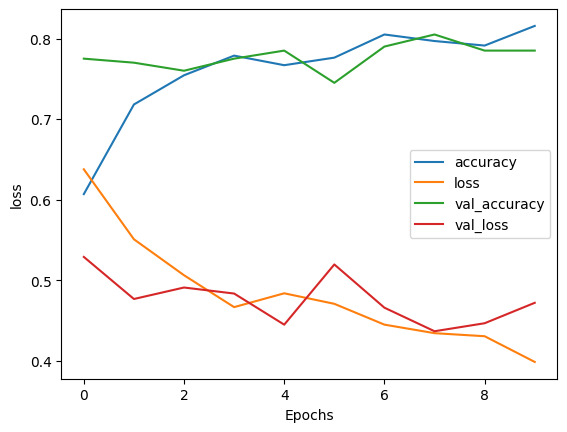

In [59]:
pd.DataFrame(model_2_loss.history).plot()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

#### Preparing testing image

In [64]:
# Libs for prediction image preparation
from tensorflow.keras.utils import load_img, img_to_array

In [97]:
# Predicition image path
img_path = root_path + '/home_office.jpg'

img_path

'/work/Personal_CG_Learning/REBELWAY/Intro_to_Machine_Learning/Source/Datasets/Interior_Exterior_Scene_Classification/home_office.jpg'

In [91]:
# Predicition image path
img_path = root_path + '/house.jpg'

img_path

'/work/Personal_CG_Learning/REBELWAY/Intro_to_Machine_Learning/Source/Datasets/Interior_Exterior_Scene_Classification/house.jpg'

In [98]:
# Pred image size, same as train data
img_size = (224, 224)

img_p = load_img(img_path, target_size=img_size)  # Rescale
img_array = img_to_array(img_p)  # convert to NumPy array
img_array = img_array / 255.0  # Pixel color normalization

# Converting to TF data structure
img_array = tf.expand_dims(img_array, axis=0)

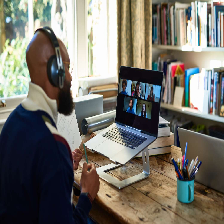

In [99]:
img_p

In [103]:
# Prediction
prediction = model_2.predict(img_array)


probability = prediction[0][0]  # As we have only one output
if probability > 0.5:
    print(f"Interior, probability: {probability:.2f}")
else:
    print(f"Exterior, probability: {probability:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Interior, probability: 0.65


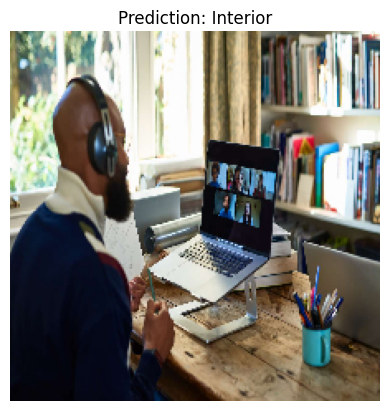

In [104]:
plt.imshow(img_p)  # Если значения были нормализованы
plt.title(f"Prediction: {'Interior' if probability > 0.5 else 'Exterior'}")
plt.axis("off")
plt.show()